# Flights Data Exploration
## by Aya Abulnasr

## Investigation Overview

> I wanted to analzye the reason of delay and flight cancellations. 

## Dataset Overview

> This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays in 2008 through all year months. I will do some data exploration over our csv data file using some visualization and numbers.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('DelayedFlights.csv')

In [3]:
Deleted=['Year','ActualElapsedTime','CRSElapsedTime','FlightNum','TailNum','CRSArrTime']
df.drop(Deleted, axis=1, inplace=True)
for i in df:
    df.loc[df['ArrDelay'] <= 15, 'Status'] = 0 #flight is on time
    df.loc[df['ArrDelay'] >= 15, 'Status'] = 1 #slightly delayed
    df.loc[df['ArrDelay'] >= 60, 'Status'] = 2 #severely delayed  
    df.loc[df['Diverted'] == 1, 'Status'] = 3
    df.loc[df['Cancelled'] == 1, 'Status'] = 4
    
canceled = df[df.Cancelled== 1]
canceled.sample(10)

Deleted_2=['Unnamed: 0','Diverted','Cancelled']
df.drop(Deleted_2, axis=1, inplace=True)
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,UniqueCarrier,AirTime,ArrDelay,DepDelay,...,Distance,TaxiIn,TaxiOut,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Status
0,1,3,4,2003.0,1955,2211.0,WN,116.0,-14.0,8.0,...,810,4.0,8.0,N,NaN,NaN,NaN,NaN,NaN,0.0
1,1,3,4,754.0,735,1002.0,WN,113.0,2.0,19.0,...,810,5.0,10.0,N,NaN,NaN,NaN,NaN,NaN,0.0
2,1,3,4,628.0,620,804.0,WN,76.0,14.0,8.0,...,515,3.0,17.0,N,NaN,NaN,NaN,NaN,NaN,0.0
3,1,3,4,1829.0,1755,1959.0,WN,77.0,34.0,34.0,...,515,3.0,10.0,N,2.0,0.0,0.0,0.0,32.0,1.0
4,1,3,4,1940.0,1915,2121.0,WN,87.0,11.0,25.0,...,688,4.0,10.0,N,NaN,NaN,NaN,NaN,NaN,0.0


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Reasons of Cancellation

> Cancellation reason was the most due to B = weather and the next reason is A = Carrier.

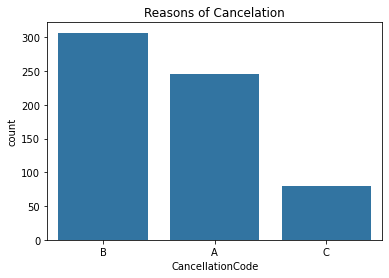

In [4]:
#Reason of Cancellation
cancelled_1=df[df.Status == 4]
default_color = sb.color_palette()[0]
sb.countplot('CancellationCode', order = cancelled_1['CancellationCode'].value_counts().index, data=cancelled_1, color = default_color)
plt.title('Reasons of Cancelation')
warnings.simplefilter("ignore")
plt.show();

## Density of Cancelled Flights

> As we saw before, still 10th of the month had the heighest propapility of cancellation in 2008. Probability of cancellation on some days monthly. I would like to know the cancellation reason for this and if it's related to some carrier on that days.

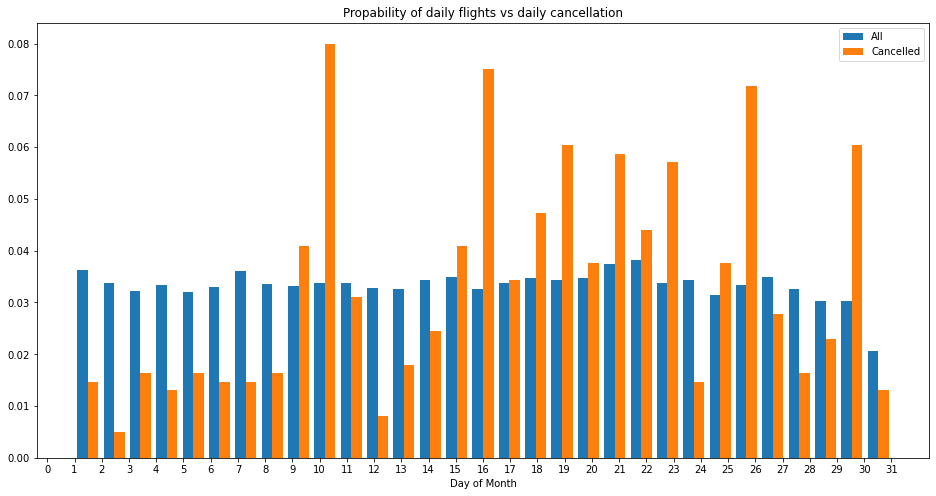

In [5]:
#Propability of daily cancellation
cancelled_2 = df[df['Status']== 4]

fig, ax = plt.subplots(figsize = (16,8))
ax.hist([df['DayofMonth'], cancelled_2['DayofMonth']], density=True ,bins=31, label=['All', 'Cancelled'])
ax.set_xlabel('Day of Month')
ax.set_title('Propability of daily flights vs daily cancellation')
plt.xticks(range(0,32))
plt.legend()
warnings.simplefilter("ignore")
plt.show()

## Is distance affects the flight cancellation? 

> Here we can see the more the flight distance, the less is the flight cancellation.

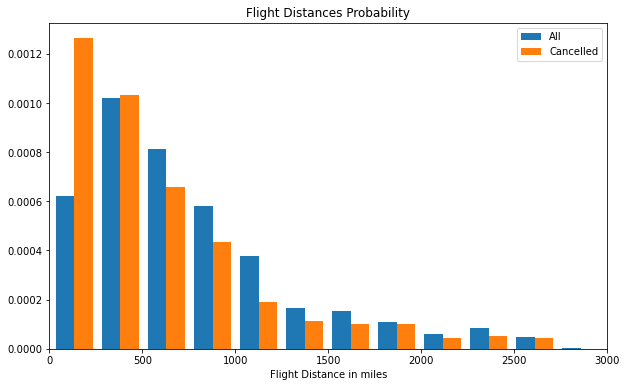

In [6]:
fig, ax = plt.subplots(figsize = (10,6))

ax.hist([df['Distance'], cancelled_2['Distance']], density=True, bins=20, label=['All', 'Cancelled'])

ax.set_xlim(0,3000)
ax.set_xlabel('Flight Distance in miles')
ax.set_title('Flight Distances Probability')
plt.legend()
warnings.simplefilter("ignore")
plt.show()

## let's focus on carrier delays and its reasons

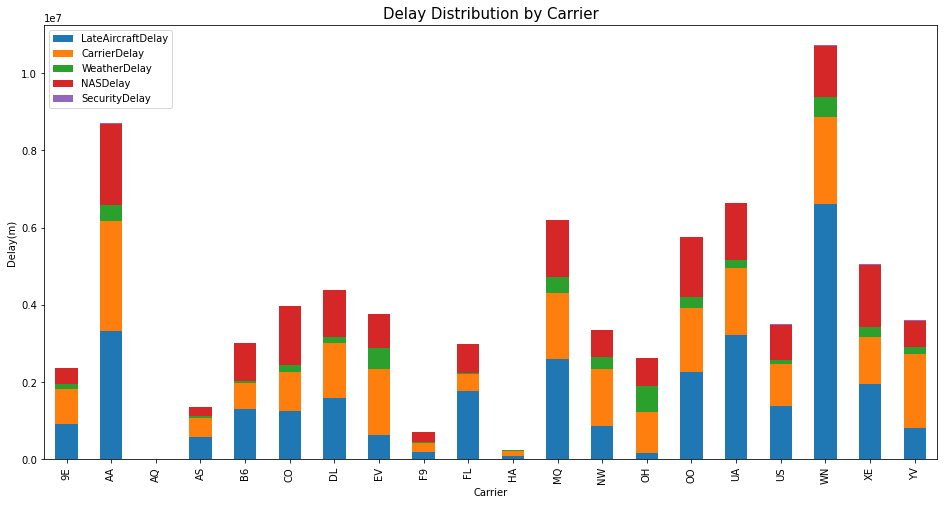

In [9]:
D2 = df.groupby('UniqueCarrier')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum()
D2.plot.bar(stacked=True ,figsize=(16, 8))
plt.xlabel("Carrier", size=10)
plt.ylabel("Delay(m)")
plt.title('Delay Distribution by Carrier', size=15)
warnings.simplefilter("ignore")

LateAircraftDelay seems to be the most effective variable on flights carrier delay especially on "WN" carrier but it could be due to "WN" high number of total flights

## Cancellation reasons regarding each carrier

As it seems Cancellation happens on most carriers due to weather factor as MQ "American Eagle Airlines" but something like HA "Hawaiian Airlines" has a few weather cancellation which make much sense.

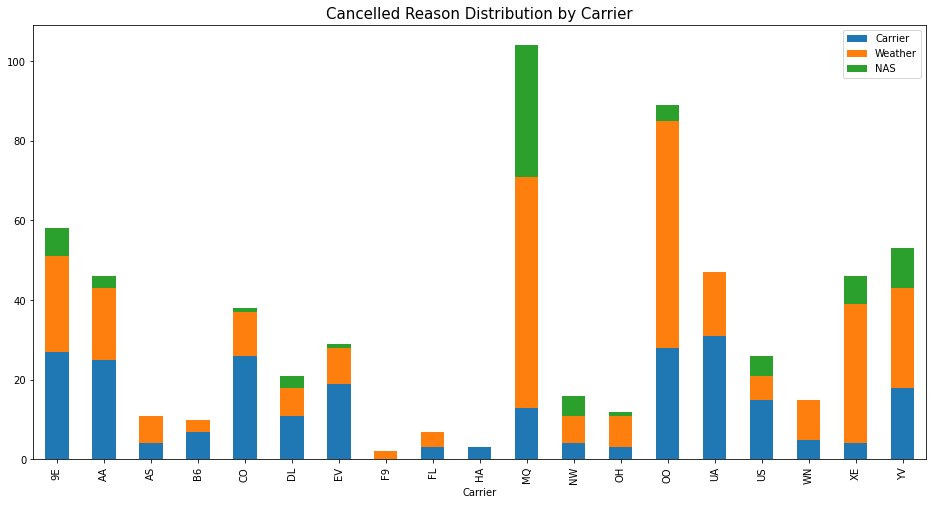

In [10]:
cancelled_3 = cancelled_2
cancelled_3[['Code_A','Code_B','Code_C']] = pd.get_dummies(cancelled_3.CancellationCode)

D3 = cancelled_3.groupby('UniqueCarrier')['Code_A','Code_B','Code_C'].sum()
D3.plot.bar(stacked=True ,figsize=(16, 8))
plt.xlabel("Carrier", size=10)
plt.title('Cancelled Reason Distribution by Carrier', size=15)
plt.legend(['Carrier','Weather','NAS'])
warnings.simplefilter("ignore");

## Delay reason along the year months.
LateAircraftDelay is the main reason for delays in most of the months, next we got CarrierDelay and NASDelay "National Airspace System" as airport operations & heavy traffic volume.

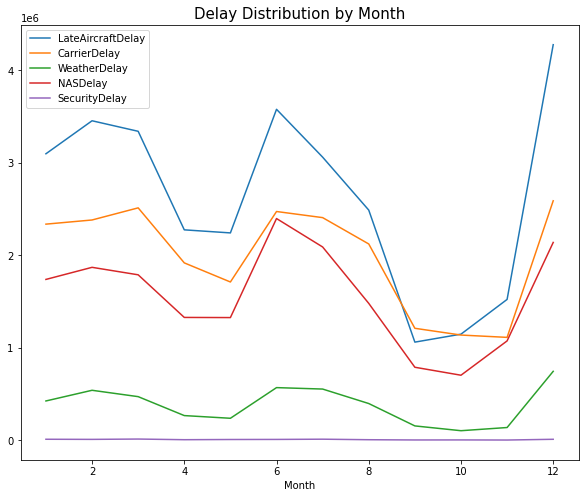

In [7]:
# Let's apply correlation matrix that shows the delay reasons along the months 
Delayedflights = df[(df.Status >= 1) & (df.Status < 3)]
#sns.distplot(Delayedflights['ArrDelay'])
#plt.show()
D2 = Delayedflights.filter(['Month','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis=1)
D2 = D2.groupby('Month')['LateAircraftDelay','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'].sum().plot(figsize=(10,8))
D2.legend
plt.title('Delay Distribution by Month', size=15)
warnings.simplefilter("ignore")
plt.show();

## Carriers perfromance with time delay "LateAircraftDelay & CarrierDelay":
on Status we will show each carrier performance

0 : flight is on time 1 : slightly delayed 2 : severely delayed 3: Diverted 4: Cancelled

### LateAircraftDelay Variable:

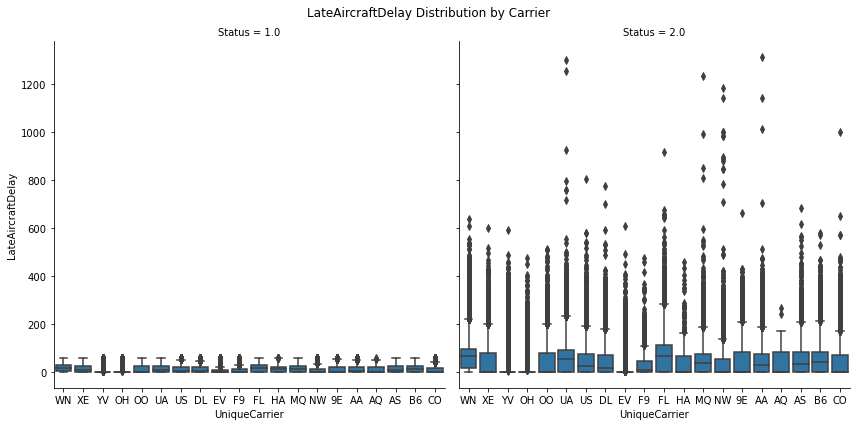

In [9]:

g = sb.FacetGrid(data = Delayedflights, col = 'Status', col_wrap = 2, size = 6 )
g.map(sb.boxplot, 'UniqueCarrier', 'LateAircraftDelay')
g.fig.subplots_adjust(top=0.9)
warnings.simplefilter("ignore")
g.fig.suptitle('LateAircraftDelay Distribution by Carrier');

As we saw before Late Aircraft Delay is the most effective delay, here we see UA has the biggest delay period in severely delay status.

### CarrierDelay Variable:

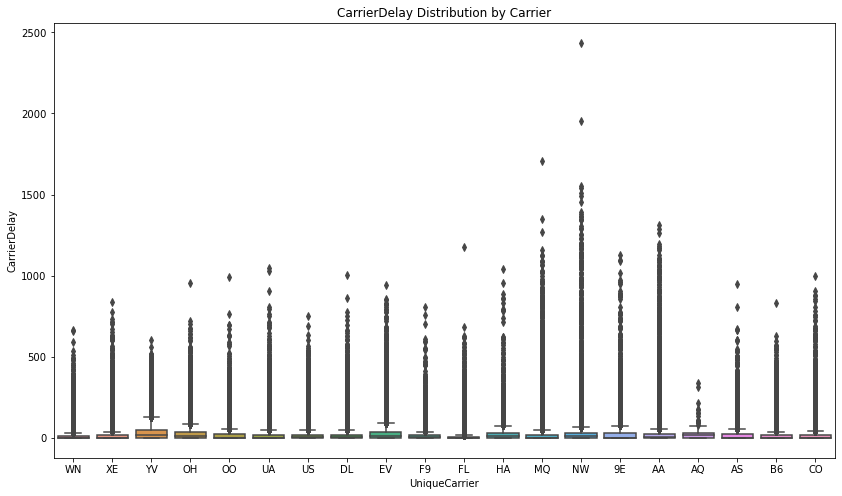

In [11]:
## Testing CarrierDelay, maybe it could relate in bivariate,
fig = plt.figure(figsize = [14,8])
D4 = sb.boxplot('UniqueCarrier','CarrierDelay', data=Delayedflights)
D4.set_title('CarrierDelay Distribution by Carrier')
plt.close(2)
warnings.simplefilter("ignore")
plt.show();

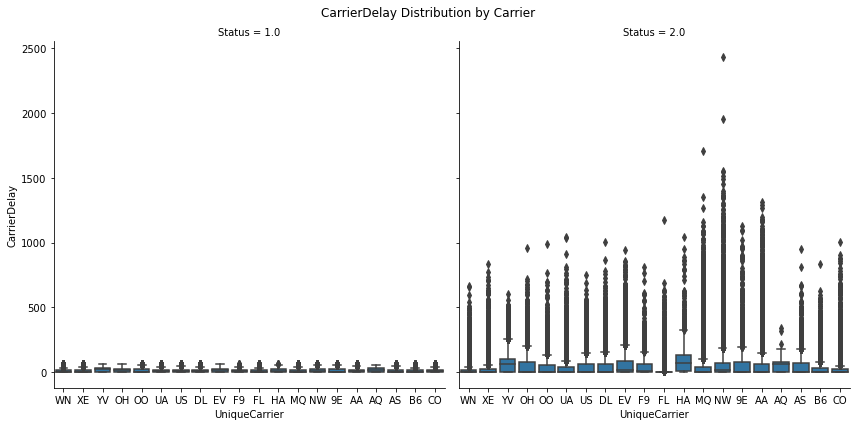

In [12]:
g = sb.FacetGrid(data = Delayedflights, col = 'Status', col_wrap = 2, size = 6 )
g.map(sb.boxplot, 'UniqueCarrier', 'CarrierDelay')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('CarrierDelay Distribution by Carrier')
warnings.simplefilter("ignore");

Carriers with higher average delay generation are Mesa Airlines (YV) & Hawaian Airlines (HA), it can be seen how airlines with lower volume of flights tend to have a higher Carrier Delay. So it seems like size matters. Also UA still has a high average carrier delay.

## Conclusion

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> On Genral, Flights delay has a strong relationship with aircraft arrival delay tothe airport also with carriers delay reasons such as aircraft cleaning, aircraft damage, crew, baggage, bird strike, fueling and so on. also the other delay reason could happens due to NASDelay "National Airspace System" as the airport operations & heavy traffic volume.

> Late Aircraft Delay is the most effective delay, here we see UA has the highest delay period makes a severe delay. Carriers Delay also with higher average delay are Mesa Airlines (YV) & Hawaian Airlines (HA), it can be seen how airlines with lower volume of flights tend to have a higher Carrier Delay. So it seems like size matters. Also UA still has a high average carrier delay.

> Cancellatons happen mainly due to weather circumstances factor as it has the most effect on big carriers' flights such as MQ "American Eagle Airlines" also NAS has a big effect when the delay is more than 60 minutes! the flight got cancelled.



### Were there any interesting or surprising interactions between features?

> The more the flight distance, the less is the flight cancellation. Which could give a special treatment to the long distance flights to avoid any cancellations under any circumstances!

#### To conclude:
With evidence, delaying factors could be eliminated as much as possilble like what happens in long distance flights which will help a lot in decresing the cancellation accidents unless there's an emergency which safety is first. Also, airport readiness and size is such a great factor as we saw NAS delay has a big impact on the flights timing and carriers.

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!